<a href="https://colab.research.google.com/github/Jesyldah/Projects/blob/main/Project_Introduction_to_Regression_Jesyldah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression Project

## 1. Defining the Question


### a) Specifying the Data Analysis Question

Recommend a new mobile plan for mobile subscribers using legacy plans

### b) Defining the Metric for Success

The analysis question will be answered by developing a model that would analyze subscribers' behavior and recommend
one of Megaline's newer plans: Smart or Ultra.

### c) Understanding the context 

Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend
one of Megaline's newer plans: Smart or Ultra.
You have access to behavior data about subscribers who have already switched to the new plans 




### d) Recording the Experimental Design

1. Reading in the data from the source so that it is available for analysis
2. Explore the data in order to understand the structure of the data
3. Prepare the data for analysis:
* Checking for and handling missing values
* Finding and removing duplicate records
* Deleting null columns & rows
* Renaming columns
* Checking for uniformity of data in the columns, correcting errors in values and datatypes
4. Modeling
* Define and train the model
* Hyparameter Tuning
* Make predictions using the model
5. Model Evaluation
* Sanity check
6. Findings and Recommendations



### e) Data Relevance

The dataset includes behavior data about subscribers who have already switched to the new plans and is therefore relevant in answering the research question


## 2. Reading the Data

In [79]:
# Importing our libraries

import pandas as pd

import numpy as np

In [80]:
# Load the dataset

# Dataset url = https://bit.ly/UsersBehaviourTelco

mobile_df = pd.read_csv('https://bit.ly/UsersBehaviourTelco')

In [81]:
# Checking the first 5 rows of data

mobile_df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [82]:
# Checking the last 5 rows of data

mobile_df.tail()

,calls,minutes,messages,mb_used,is_ultra
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0
3213,80.0,566.09,6.0,29480.52,1


In [83]:
# Determine the size of the dataset

mobile_df.shape

(3214, 5)

In [84]:
# Checking variable datatypes

mobile_df.dtypes

calls       float64
minutes     float64
messages    float64
mb_used     float64
is_ultra      int64
dtype: object

In [85]:
# View the variables in the dataset

mobile_df.columns

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')

The dataset provided has a total of 3,214 observations and 5 variables. The variables are:
* сalls — number of calls,
* minutes — total call duration in minutes,
* messages — number of text messages,
* mb_used — Internet traffic used in MB,
* is_ultra — plan for the current month (Ultra - 1, Smart - 0).

## 3. External Data Source Validation

The data provided is valid

## 4. Data Preparation

### Performing Data Cleaning

In [86]:
# Checking for duplicate rows in the dataset

sum(mobile_df.duplicated())

0

There are no duplicate observations in the dataset

In [87]:
# Checking if any of the columns are all null

mobile_df.isnull().all(1).any()

False

In [88]:
# Checking if any of the rows are all null

mobile_df.isnull().all(0).any()

False

None of the rows or columns are all null

In [89]:
# Check for missing values

print(mobile_df.isnull().values.any())

mobile_df.isnull().sum()

False


calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

The dataset does not contain missing values

In [90]:
# Obtain summary statistics for the dataset

mobile_df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


## 5. Solution Implementation

### Data Preparation

The dataset is already preprocessed and ready for modelling

### Defining and training the model

#### Datasets, features and target selection

In [91]:
# Split the dataset into training, validation and test datasets

# Import train_test_split from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Use train_test_split function to split the dataset into training, validation and test datasets in the ratio 3:1:1
df_train, df_valid= train_test_split(mobile_df, test_size=0.4,random_state=12345)
df_valid, df_test= train_test_split(df_valid, test_size=0.5,random_state=12345)

# Declare features and target variables for the different datasets
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']
features_test = df_valid.drop(['is_ultra'], axis=1)
target_test = df_valid['is_ultra']

# Display number of observations for each dataset
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(1928, 5)
(643, 5)
(643, 5)


### Hyperprameter tuning

#### Decision tree classifier  model

In [92]:
# import decision tree from the sklearn library
from sklearn.tree import DecisionTreeClassifier

# Loop over the 'max_depth' hyperparameter to determine the one with highest accuracy score
for depth in range(1, 21):
        model1 = DecisionTreeClassifier(random_state=12345, max_depth=depth) # Define the model

        model1.fit(features_train, target_train) # Train the model

        print("max_depth =", depth, ": ", end='') # Loop through the different depths
        print(model1.score(features_valid, target_valid)) # Display the accuracies

max_depth = 1 : 0.7542768273716952
max_depth = 2 : 0.7822706065318819
max_depth = 3 : 0.7853810264385692
max_depth = 4 : 0.7791601866251944
max_depth = 5 : 0.7791601866251944
max_depth = 6 : 0.7838258164852255
max_depth = 7 : 0.7822706065318819
max_depth = 8 : 0.7791601866251944
max_depth = 9 : 0.7822706065318819
max_depth = 10 : 0.7744945567651633
max_depth = 11 : 0.7620528771384136
max_depth = 12 : 0.7620528771384136
max_depth = 13 : 0.7558320373250389
max_depth = 14 : 0.7589424572317263
max_depth = 15 : 0.7465007776049767
max_depth = 16 : 0.7340590979782271
max_depth = 17 : 0.7356143079315708
max_depth = 18 : 0.7309486780715396
max_depth = 19 : 0.7278382581648523
max_depth = 20 : 0.7216174183514774


The decision tree classifier model has the highest accuracy of 0.785 when the hyperparameter 'max_depth' = 3 

#### Random Forest

In [93]:
# import random forest classifier from the sklearn library
from sklearn.ensemble import RandomForestClassifier

# Loop over the 'n_estimators' hyperparameter to determine the one with highest accuracy score
for estimator in range(1, 21):
        model2 = RandomForestClassifier(random_state=12345, n_estimators=estimator) # Define the model

        model2.fit(features_train, target_train) # Train the model

        print("n_estimators =", estimator, ": ", end='') # Loop through the different number of estimators
        print(model2.score(features_valid, target_valid)) # Display the accuracies

n_estimators = 1 : 0.7107309486780715
n_estimators = 2 : 0.7636080870917574
n_estimators = 3 : 0.7387247278382582
n_estimators = 4 : 0.7713841368584758
n_estimators = 5 : 0.749611197511664
n_estimators = 6 : 0.7807153965785381
n_estimators = 7 : 0.7682737169517885
n_estimators = 8 : 0.7822706065318819
n_estimators = 9 : 0.7729393468118196
n_estimators = 10 : 0.7853810264385692
n_estimators = 11 : 0.7838258164852255
n_estimators = 12 : 0.7869362363919129
n_estimators = 13 : 0.7822706065318819
n_estimators = 14 : 0.7838258164852255
n_estimators = 15 : 0.7838258164852255
n_estimators = 16 : 0.7869362363919129
n_estimators = 17 : 0.7869362363919129
n_estimators = 18 : 0.7931570762052877
n_estimators = 19 : 0.7884914463452566
n_estimators = 20 : 0.7869362363919129


The random forest classifier model has the highest accuracy of 0.793 when the hyperparameter 'n_estimators' = 18

#### Logistic Regression

In [94]:
# import logistic regression from the sklearn library
from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression(random_state=12345, solver='liblinear') # Define the model

model3.fit(features_train, target_train) # Train the model

print(model3.score(features_valid, target_valid)) # Display model accuracy

0.7589424572317263


The logistic regression model has an accuracy of 0.759

### Model selection

The random forest classifier model, with n_estimators = 18  attained the highest accuracy score of 0.79 on the validation dataset

In [95]:
# Obtain the accuracy score on the test dataset

model2 = RandomForestClassifier(random_state=12345, n_estimators=18) # Define the model
model2.fit(features_train, target_train) # Train the model
print(model2.score(features_test, target_test)) # Display the accuracies

0.7931570762052877


The trained model then attains an accuracy store of 0.79 on the test dataset

In [96]:
# Training the best performing model using the whole train dataset for higher accuracy

# Declare features and target variables
features = mobile_df.drop(['is_ultra'], axis=1)
target = mobile_df['is_ultra']

model = RandomForestClassifier(random_state=12345, n_estimators=18) # Define the model

model.fit(features, target) # Train the model

print(model.score(features, target)) # Display model accuracy

0.9928438083385189


When we train the selected model (RandomForestClassifier(random_state=12345, n_estimators=18) with the entire dataset, we get an accuracy score of 0.99

#### Model sanity check

0    0.706065
1    0.293935
Name: is_ultra, dtype: float64


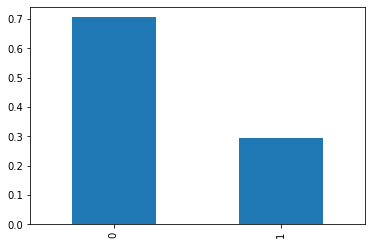

In [97]:
# Obtain sanity check by counting the target variable's class frequencies

# Count classes in the target feature on the test dataset using value_counts() method
test_class_frequency = target_test.value_counts(normalize = True) # Make the frequencies relative (from 0 to 1)

print(test_class_frequency) # Print the frequencies on the screen

test_class_frequency.plot(kind = 'bar') # Display using plot() method

0    0.715397
1    0.284603
dtype: float64


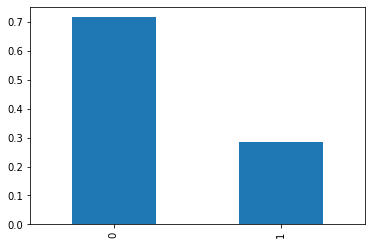

In [98]:
# Analyze the class frequencies of the model predictions on the test dataset using the value_counts() method

# Convert the predictions to pd.Series for value_counts() work
predicted_test = pd.Series(model.predict(features_test))

# Save the counts in the class_frequency variable
model_class_frequency = predicted_test.value_counts(normalize = True) # Make the frequencies relative (from 0 to 1)

print(model_class_frequency) # Print the frequencies on the screen

model_class_frequency.plot(kind = 'bar') # Display using plot() method

Class frequency for the test dataset is:
1. **Class 0: 0.71** 
2. **Class 1: 0.29**

Analyzing the class frequencies using the model predictions on the test data reveals a class frequency of:
1. **Class 0: 0.72** 
2. **Class 1: 0.28**

The classes are fairly balanced in both cases


### Prediction using the trained model

In [99]:
# Preview the dataset

mobile_df.sample()

,calls,minutes,messages,mb_used,is_ultra
1867,114.0,758.19,0.0,33038.2,1


In [100]:
# Create new observations to be used in the model

new_features = pd.DataFrame(
    [
        [100, 500, 80, 10000],
        [30, 100, 20, 300],
        [1500, 600, 100, 30000],
     
    ],
    columns=features.columns,
)

new_features

,calls,minutes,messages,mb_used
0,100,500,80,10000
1,30,100,20,300
2,1500,600,100,30000


In [101]:
# Predict the target variable using the new observations

answers = model.predict(new_features)

print(answers)

[0 0 1]


### Recommendations

The final model is fairly accurate and can be adopted by the company to recommend a new mobile plan to customers, using their historical data on usage


## Challenging your Solution

What if we standardized the features. Would this improve the model accuracy?

In [102]:
# Import the dataset
mobile_df2 = pd.read_csv('https://bit.ly/UsersBehaviourTelco')

# Use the StandardScaler module to standardize the numeric features
# Import StandardScaler from the library
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Use train_test_split function to split the dataset into training, validation and test datasets in the ratio 3:1:1
df_train2, df_valid2= train_test_split(mobile_df2, test_size=0.4,random_state=12345)
df_valid2, df_test2= train_test_split(df_valid2, test_size=0.5,random_state=12345)

# Declare features and target variables
features_train2 = df_train2.drop(['is_ultra'], axis=1)
target_train2 = df_train2['is_ultra']
features_valid2 = df_valid2.drop(['is_ultra'], axis=1)
target_valid2 = df_valid2['is_ultra']
features_test2 = df_valid2.drop(['is_ultra'], axis=1)
target_test2 = df_valid2['is_ultra']

#Create an instance of the StandardScaler() class 
scaler = StandardScaler()

# Tune the instance using data
scaler.fit(features_train2)
scaler.fit(features_valid2)
scaler.fit(features_test2)

# Transform the datasets
features_train2_scaled = scaler.transform(features_train2)
features_valid2_scaled = scaler.transform(features_valid2)
features_test2_scaled = scaler.transform(features_test2)

In [103]:
# Preview the scaled features

features_train2_scaled

array([[-0.1061352 , -0.05431147, -0.31868684, -0.36844583],
       [-0.93167875, -0.77515286,  0.61532089, -0.02177348],
       [-0.3507407 , -0.44304335,  0.87005028, -0.2753034 ],
       ...,
       [ 2.46222252,  2.00185624, -1.05457171,  0.97425265],
       [-0.77880032, -0.618759  , -0.00735093,  1.4866198 ],
       [ 2.95143352,  2.77243175,  1.63423842,  2.52524845]])

### New model - Hyperparameter tuning and evaluation

#### Decision tree model

In [104]:
# Loop to get accuracy scores using different 'max_depth' values

for depth in range(1, 21):
        model11 = DecisionTreeClassifier(random_state=12345, max_depth=depth) # Define the model

        model11.fit(features_train2_scaled, target_train2) # Train the model

        print("max_depth =", depth, ": ", end='') # Loop through the different depths
        print(model11.score(features_valid2_scaled, target_valid2)) # Display the accuracies on validation dataset predictions

max_depth = 1 : 0.7542768273716952
max_depth = 2 : 0.7822706065318819
max_depth = 3 : 0.7838258164852255
max_depth = 4 : 0.7776049766718507
max_depth = 5 : 0.7776049766718507
max_depth = 6 : 0.7807153965785381
max_depth = 7 : 0.7791601866251944
max_depth = 8 : 0.776049766718507
max_depth = 9 : 0.7807153965785381
max_depth = 10 : 0.7713841368584758
max_depth = 11 : 0.7589424572317263
max_depth = 12 : 0.76049766718507
max_depth = 13 : 0.7542768273716952
max_depth = 14 : 0.7542768273716952
max_depth = 15 : 0.7433903576982893
max_depth = 16 : 0.7293934681181959
max_depth = 17 : 0.7325038880248833
max_depth = 18 : 0.7278382581648523
max_depth = 19 : 0.7262830482115086
max_depth = 20 : 0.71850699844479


#### Random forest classifier model

In [105]:
# Loop to get accuracy scores using different 'n_estimators' values

for estimator in range(1, 21):
        model22 = RandomForestClassifier(random_state=12345, n_estimators=estimator) # Define the model

        model22.fit(features_train2_scaled, target_train2) # Train the model

        print("n_estimators =", estimator, ": ", end='') # Loop through the different number of estimators
        print(model22.score(features_valid2_scaled, target_valid2)) # Display the accuracies on validation dataset predictions

n_estimators = 1 : 0.7091757387247278
n_estimators = 2 : 0.76049766718507
n_estimators = 3 : 0.7402799377916018
n_estimators = 4 : 0.7698289269051322
n_estimators = 5 : 0.749611197511664
n_estimators = 6 : 0.7807153965785381
n_estimators = 7 : 0.7698289269051322
n_estimators = 8 : 0.7822706065318819
n_estimators = 9 : 0.7744945567651633
n_estimators = 10 : 0.7869362363919129
n_estimators = 11 : 0.7838258164852255
n_estimators = 12 : 0.7884914463452566
n_estimators = 13 : 0.7853810264385692
n_estimators = 14 : 0.7853810264385692
n_estimators = 15 : 0.7838258164852255
n_estimators = 16 : 0.7900466562986003
n_estimators = 17 : 0.7853810264385692
n_estimators = 18 : 0.7916018662519441
n_estimators = 19 : 0.7869362363919129
n_estimators = 20 : 0.7884914463452566


#### Logistic regression model

In [106]:
# get accuracy for the logistic regression model

model33 = LogisticRegression(random_state=12345, solver='liblinear') # Define the model

model33.fit(features_train2_scaled, target_train2) # Train the model

print(model33.score(features_valid2_scaled, target_valid2)) # Display the accuracies on validation dataset predictions

0.7558320373250389


### Findings

Scaling the features has had a minimal decrease in the accuracy of the model predictions on the validation data set across all the models as shown;
Accuracy decreases:
1. Decision tree model: From 0.785 to 0.784, with max_depth = 3
2. Random forest model: From 0.793 to 0.792, with n_estimators = 18
3. Logistic regression model: From 0.759 to 0.756

In [107]:
# Get accuracy of the best performing model using the test dataset

model2 = RandomForestClassifier(random_state=12345, n_estimators=18) # Define the model

model2.fit(features_train2_scaled, target_train2) # Train the model

print(model2.score(features_test2_scaled, target_test2)) # Display the accuracies

0.7916018662519441


Accuracy of the best performing model (RandomForestClassifier(random_state=12345, n_estimators=18)), in test dataset has also reduced slighlty from 0.793 to 0.792

Let us now train the best performing model using the whole dataset and observe the changes in the prediction for new features. Will they be similar with the previous findings?

In [108]:
# Training the new best performing model using the whole train dataset for higher accuracy

# Declare features and target variables
features2 = mobile_df2.drop(['is_ultra'], axis=1)
target2 = mobile_df2['is_ultra']

# Tune the instance using data
scaler.fit(features2)

# Transform the datasets
features2_scaled = scaler.transform(features2)

model2 = RandomForestClassifier(random_state=12345, n_estimators=18) # Define the model

model2.fit(features2_scaled, target2) # Train the model

print(model2.score(features2_scaled, target2)) # Display model accuracy

0.9928438083385189


In [109]:
# Predict the target variable using the new observations
# Tune the instance using data
scaler.fit(new_features)

# Transform the dataset
new_features_scaled = scaler.transform(new_features)

# Obtain model predictions
answers2 = model2.predict(new_features_scaled)

print(answers)
print(answers2)

[0 0 1]
[0 0 1]


### Summary
* While the accuracy on the test dataset has decreased slightly from 0.793 to 0.792, the accuracy on the whole dataset is 0.993 on both. The predictions on the 3 new features are is also the same for both models

* The company can adopt either model as the results are similar

## 7. Follow up questions

### a). Did we have the right data?

Yes

### b). Do we need other data to answer our question?

If the total cost of the monthly usage is different from the plan subscription cost, then the data on 'total charges' per month could be useful in providing additional insights on customer preference

### c). Did we have the right question?

Yes we did